In [1]:
import xarray as xr
import numpy as np
import xgcm
from xmitgcm import open_mdsdataset
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['font.size'] = 16

from bbl_utils import *

import warnings
warnings.filterwarnings('ignore', '.*.')

div_cmap = plt.get_cmap('RdBu_r')
div_cmap.set_bad(color=(0.8,0.8,0.8))

cmap = plt.get_cmap('viridis')
cmap.set_bad(color=(0.8,0.8,0.8))

### Physical parameters

In [2]:
Γ = 0.0008613659531090722
θ = 1.53E-3
f = 0.53e-4

### Load dataset

In [3]:
nIter = 35
step0 = 72000

iters = range(step0,nIter*step0+step0,step0)

step0_snap = 1800
iters_snap = range(step0_snap, nIter*step0+step0_snap, step0_snap)
print("Iters: ",list(iters))

Iters:  [72000, 144000, 216000, 288000, 360000, 432000, 504000, 576000, 648000, 720000, 792000, 864000, 936000, 1008000, 1080000, 1152000, 1224000, 1296000, 1368000, 1440000, 1512000, 1584000, 1656000, 1728000, 1800000, 1872000, 1944000, 2016000, 2088000, 2160000, 2232000, 2304000, 2376000, 2448000, 2520000]


In [4]:
data_dir = "../../MITgcm/experiments/rotated_BBTRE_rest/run/"
#ds_snap = open_mdsdataset(data_dir,iters=iters_snap,ignore_unknown_vars=True,prefix=["snapshotDiag"],levels=[100,150,200])
ds = open_mdsdataset(data_dir,iters=iters,ignore_unknown_vars=True,prefix=["standardDiag", "budgetDiag"])

### Pre-process dataset

In [5]:
#ds_snap, coords_snap, grid_snap = pre_process(ds_snap)
#ds_snap, coords_snap = add_cartesian_coordinates(ds_snap, coords_snap, θ)
#ds_snap = add_background_temp(ds_snap, Γ)
#ds_snap, coords_snap = add_hab_coordinates(ds_snap, coords_snap)

In [6]:
ds, coords, grid = pre_process(ds)
ds, coords = add_cartesian_coordinates(ds, coords, θ)
ds = add_background_temp(ds, Γ)
ds, coords = add_hab_coordinates(ds, coords)
ds = add_Nsq(ds, Γ)

In [7]:
ds

<xarray.Dataset>
Dimensions:   (XC: 800, XG: 800, YC: 120, YG: 120, Z: 260, Zl: 260, Zp1: 261, Zu: 260, time: 35)
Coordinates:
  * time      (time) float64 7.2e+04 1.44e+05 2.16e+05 ... 2.448e+06 2.52e+06
  * XC        (XC) >f8 250.0 750.0 1.25e+03 ... 3.988e+05 3.992e+05 3.998e+05
  * YC        (YC) >f8 250.0 750.0 1.25e+03 ... 5.875e+04 5.925e+04 5.975e+04
  * XG        (XG) >f8 0.0 500.0 1e+03 1.5e+03 ... 3.985e+05 3.99e+05 3.995e+05
  * YG        (YG) >f8 0.0 500.0 1e+03 1.5e+03 ... 5.85e+04 5.9e+04 5.95e+04
  * Z         (Z) float64 3.25e+03 3.179e+03 3.111e+03 ... 7.5 2.5 -2.5
  * Zp1       (Zp1) float64 3.285e+03 3.214e+03 3.144e+03 ... -1.364e-12 -5.0
  * Zu        (Zu) float64 3.214e+03 3.144e+03 3.077e+03 ... 5.0 -1.364e-12 -5.0
  * Zl        (Zl) float64 3.285e+03 3.214e+03 3.144e+03 ... 10.0 5.0 -1.364e-12
    Zr        (XC, Z) float64 3.25e+03 3.18e+03 3.111e+03 ... 619.1 614.1 609.1
    Xr        (XC, Z) float64 245.0 245.1 245.2 ... 3.997e+05 3.997e+05
    Zr_V      (XC, Z) float64 3.25e+03 3.18e+03 3.111e+03 ... 619.1 614.1 609.1
    Xr_V      (XC, Z) float64 245.0 245.1 245.2 ... 3.997e+05 3.997e+05
    Zr_U      (XG, Z) float64 3.25e+03 3.179e+03 3.111e+03 ... 618.7 613.7 608.7
    Xr_U      (XG, Z) float64 -4.972 -4.864 -4.759 ... 3.995e+05 3.995e+05
    Zr_W      (XC, Zl) float64 3.286e+03 3.214e+03 3.145e+03 ... 616.6 611.6
    Xr_W      (XC, Zl) float64 245.0 245.1 245.2 ... 3.997e+05 3.997e+05
    Z_hab     (Z, YC, XC) float64 dask.array<chunksize=(260, 120, 800), meta=np.ndarray>
    Zl_hab    (Zl, YC, XC) float64 dask.array<chunksize=(260, 120, 800), meta=np.ndarray>
Data variables:
    gT_Forc   (time, Z, YC, XC) float64 dask.array<chunksize=(1, 260, 120, 800), meta=np.ndarray>
    ADVr_TH   (time, Zl, YC, XC) float64 dask.array<chunksize=(1, 260, 120, 800), meta=np.ndarray>
    ADVx_TH   (time, Z, YC, XG) float64 dask.array<chunksize=(1, 260, 120, 800), meta=np.ndarray>
    ADVy_TH   (time, Z, YG, XC) float64 dask.array<chunksize=(1, 260, 120, 800), meta=np.ndarray>
    DFrI_TH   (time, Zl, YC, XC) float64 dask.array<chunksize=(1, 260, 120, 800), meta=np.ndarray>
    DFxE_TH   (time, Z, YC, XG) float64 dask.array<chunksize=(1, 260, 120, 800), meta=np.ndarray>
    DFyE_TH   (time, Z, YG, XC) float64 dask.array<chunksize=(1, 260, 120, 800), meta=np.ndarray>
    TOTTTEND  (time, Z, YC, XC) float64 dask.array<chunksize=(1, 260, 120, 800), meta=np.ndarray>
    TOTUTEND  (time, Z, YC, XG) float64 dask.array<chunksize=(1, 260, 120, 800), meta=np.ndarray>
    TOTVTEND  (time, Z, YG, XC) float64 dask.array<chunksize=(1, 260, 120, 800), meta=np.ndarray>
    KVDIFF    (time, Zl, YC, XC) float64 dask.array<chunksize=(1, 260, 120, 800), meta=np.ndarray>
    THETA     (time, Z, YC, XC) float64 dask.array<chunksize=(1, 260, 120, 800), meta=np.ndarray>
    UVEL      (time, Z, YC, XG) float64 dask.array<chunksize=(1, 260, 120, 800), meta=np.ndarray>
    VVEL      (time, Z, YG, XC) float64 dask.array<chunksize=(1, 260, 120, 800), meta=np.ndarray>
    WVEL      (time, Zl, YC, XC) float64 dask.array<chunksize=(1, 260, 120, 800), meta=np.ndarray>
    DRHODR    (time, Zl, YC, XC) float64 dask.array<chunksize=(1, 260, 120, 800), meta=np.ndarray>
    THETA_BG  (time, Z, YC, XC) float64 dask.array<chunksize=(1, 260, 120, 800), meta=np.ndarray>
    Nsq       (time, Zl, YC, XC) float64 dask.array<chunksize=(1, 260, 120, 800), meta=np.ndarray>

### Plotting

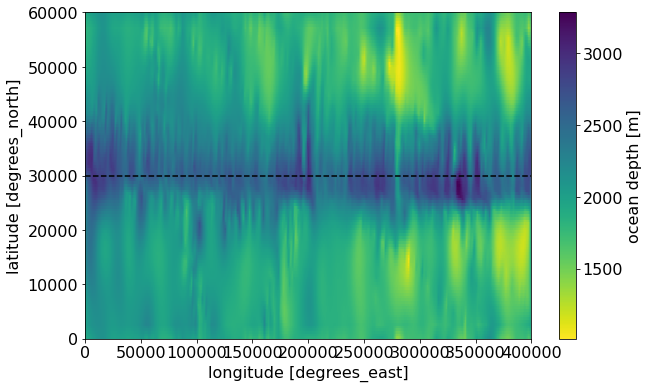

In [8]:
coords['Depth'].plot(cmap='viridis_r')

plt.plot([0, 4e5], [3.e4, 3.e4], "k--")

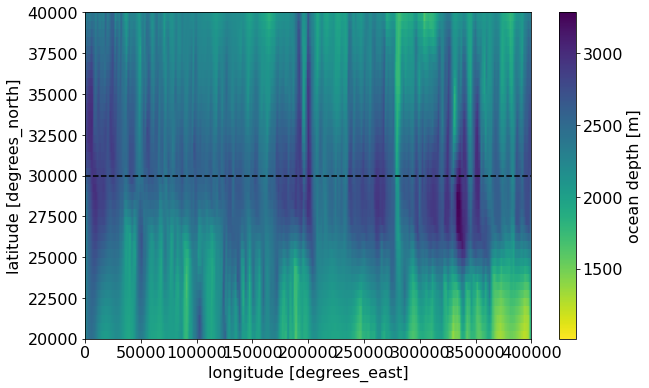

In [9]:
coords['Depth'].plot(cmap='viridis_r')

plt.ylim([2.e4,4.e4])

plt.plot([0, 4e5], [3.e4, 3.e4], "k--")

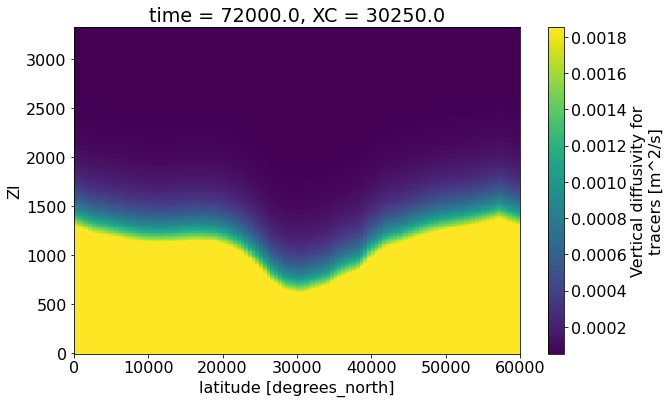

In [10]:
ds['KVDIFF'].isel(XC=60, time=0).plot()

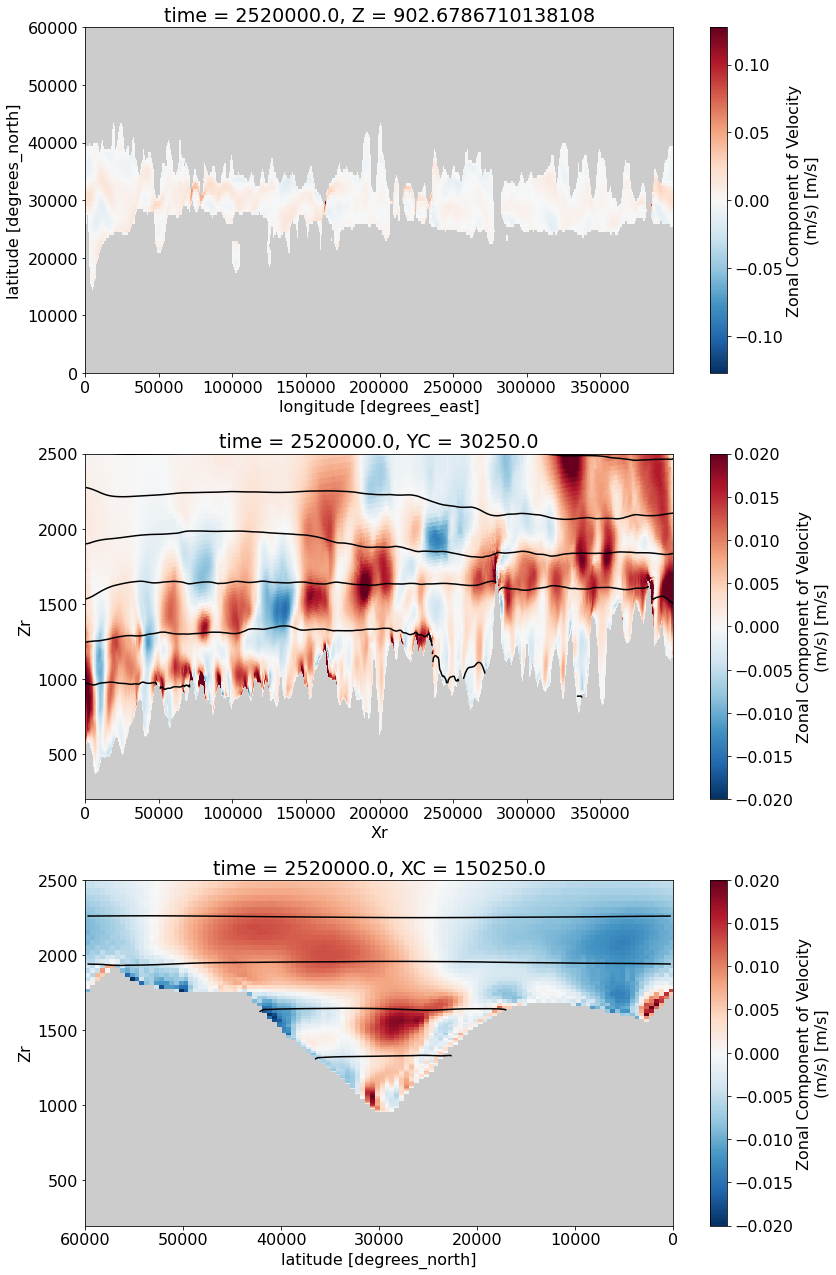

In [11]:
plt.figure(figsize=(12,18))

plt.subplot(3,1,1, facecolor=(.8, .8, .8))
ds['UVEL'] = ds['UVEL'].where(ds['UVEL'] != 0.)
ds['UVEL'].isel(time=-1).sel(Z=900, method='nearest').plot(cmap=div_cmap)

plt.subplot(3,1,2, facecolor=(.8, .8, .8))
q = ds['UVEL'].isel(time=-1).sel(YC=3e4, method='nearest').plot(x='Xr_U', y='Zr_U')
q.set_clim([-2e-2, 2e-2])
ds['THETA_BG'].isel(time=-1).sel(YC=3e4, method='nearest').plot.contour(x='Xr', y='Zr', colors='black', levels=np.arange(0.4, 2.5, 0.25))
plt.ylim([200,2500])

plt.subplot(3,1,3, facecolor=(.8, .8, .8))
q = ds['UVEL'].isel(time=-1).sel(XG=1.5e5, method='nearest').plot(x='YC', y='Zr_U')
q.set_clim([-2e-2, 2e-2])
ds['THETA_BG'].isel(time=-1).sel(XC=1.5e5, method='nearest').plot.contour(x='YC', y='Zr', colors='black', levels=np.arange(0.4, 2.5, 0.25))
plt.ylim([200,2500])
plt.xlim([6.e4, 0.])

plt.tight_layout()
plt.savefig("../../figures/BBTRE_u.png", bbox_inches='tight', dpi=100.)

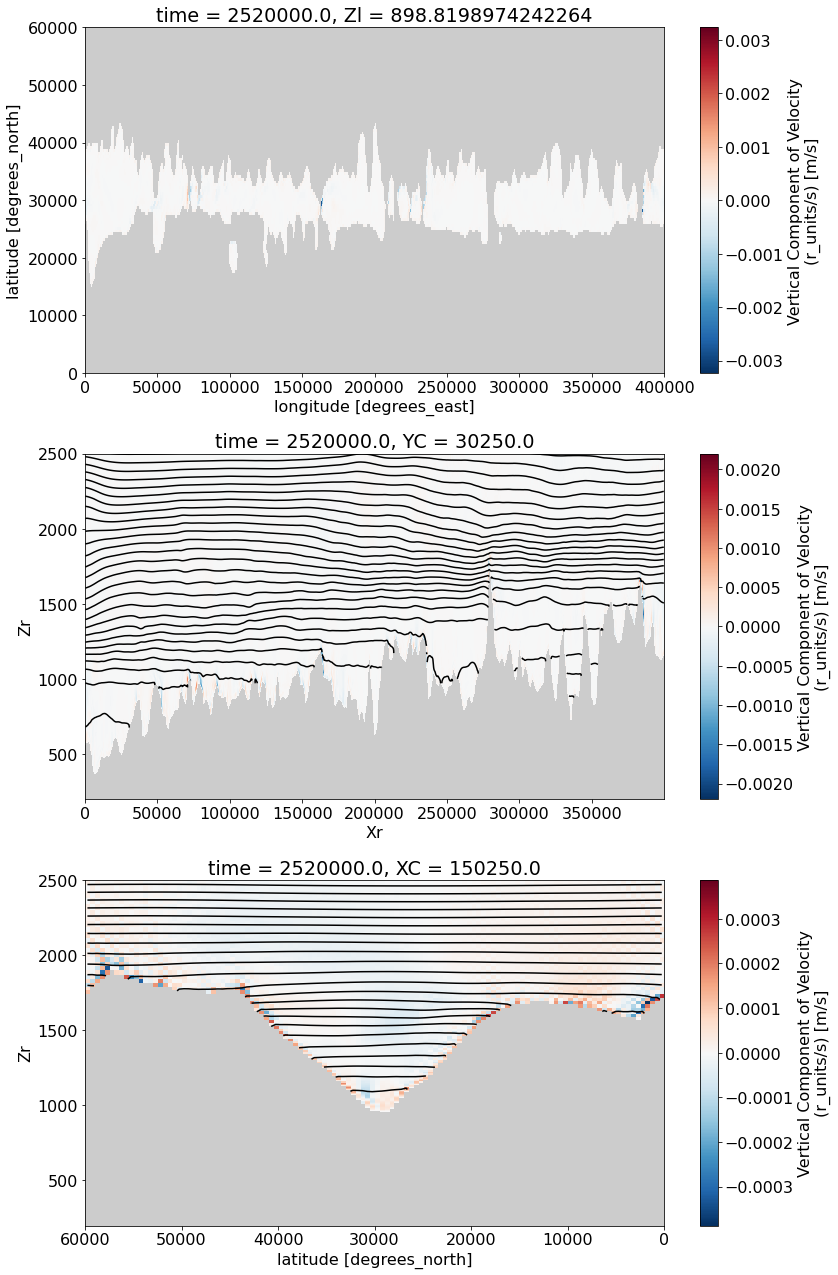

In [12]:
plt.figure(figsize=(12,18))

plt.subplot(3,1,1, facecolor=(.8, .8, .8))
ds['WVEL'] = ds['WVEL'].where(ds['WVEL'] != 0.)
ds['WVEL'].isel(time=-1).sel(Zl=900, method='nearest').plot(cmap=div_cmap)

plt.subplot(3,1,2, facecolor=(.8, .8, .8))
q = ds['WVEL'].isel(time=-1).sel(YC=3e4, method='nearest').plot(x='Xr_W', y='Zr_W')
ds['THETA_BG'].isel(time=-1).sel(YC=3e4, method='nearest').plot.contour(x='Xr', y='Zr', colors='black', levels=np.arange(0.4, 2.5, 0.05))
plt.ylim([200,2500])

plt.subplot(3,1,3, facecolor=(.8, .8, .8))
q = ds['WVEL'].isel(time=-1).sel(XC=1.5e5, method='nearest').plot(x='YC', y='Zr_W')
ds['THETA_BG'].isel(time=-1).sel(XC=1.5e5, method='nearest').plot.contour(x='YC', y='Zr', colors='black', levels=np.arange(0.4, 2.5, 0.05))
plt.ylim([200,2500])
plt.xlim([6.e4, 0.])

plt.tight_layout()
plt.savefig("../../figures/BBTRE_w.png", bbox_inches='tight', dpi=100.)

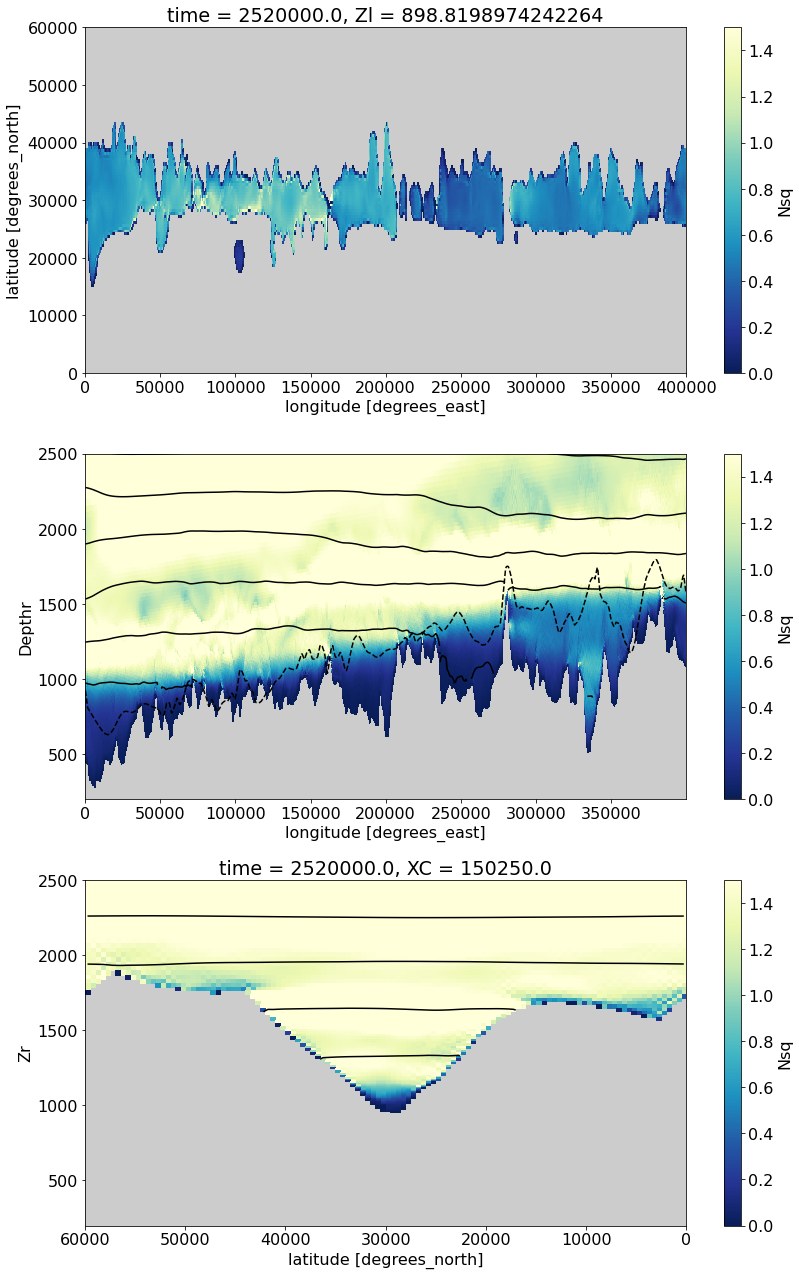

In [13]:
plt.figure(figsize=(12,18))

ti = -1

plt.subplot(3,1,1, facecolor=(.8, .8, .8))
ds['Nsq'] = ds['Nsq'].where(ds['Nsq'] != 0.)
q = (ds['Nsq']*1e6).isel(time=ti).sel(Zl=900, method='nearest').plot(cmap='YlGnBu_r')
q.set_clim([0., 1.5])

plt.subplot(3,1,2, facecolor=(.8, .8, .8))
#q = (ds['Nsq']*1e6).isel(time=ti).sel(YC=3e4, method='nearest').plot(x='Xr_W', y='Zr_W', cmap='YlGnBu_r')
q = (ds['Nsq']*1e6).isel(time=ti).mean(dim='YC').plot(x='Xr_W', y='Zr_W', cmap='YlGnBu_r')
q.set_clim([0., 1.5])
ds['THETA_BG'].isel(time=ti).sel(YC=3e4, method='nearest').plot.contour(x='Xr', y='Zr', colors='black', levels=np.arange(0.4, 2.5, 0.25))
plt.ylim([200,2500])
(-coords['Depthr'].isel(YC=0) + coords['Depthr'].sel(YC=3.e4, XC=0, method='nearest')).plot(color="k",linestyle="--")

plt.subplot(3,1,3, facecolor=(.8, .8, .8))
q = (ds['Nsq']*1e6).isel(time=ti).sel(XC=1.5e5, method='nearest').plot(x='YC', y='Zr_W', cmap='YlGnBu_r')
q.set_clim([0., 1.5])
ds['THETA_BG'].isel(time=ti).sel(XC=1.5e5, method='nearest').plot.contour(x='YC', y='Zr', colors='black', levels=np.arange(0.4, 2.5, 0.25))
plt.ylim([200,2500])
plt.xlim([6.e4, 0.])

plt.tight_layout()
plt.savefig("../../figures/BBTRE_Nsq.png", bbox_inches='tight', dpi=100.)

(1e-09, 1e-05)

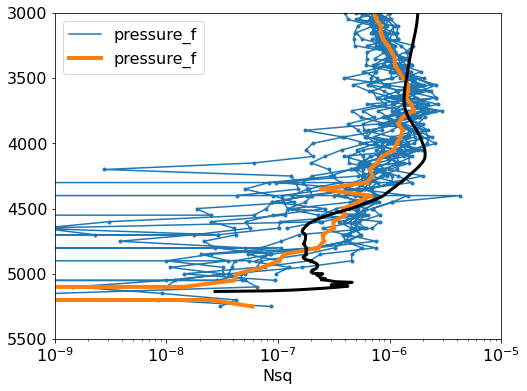

In [14]:
import pandas as pd
cdf = pd.read_csv("../../data/BBTRE_hydrography_z-binned.csv")
cdf = cdf[cdf['in canyon'] == True]

fig, ax = plt.subplots(figsize=(8,6))
cdf.plot(x='Nsq', y='pressure_f',marker='.', ax=ax, logx=True)
cdf.groupby('pressure_f').mean().reset_index().plot(x='Nsq', y='pressure_f',marker='.', color='C1', lw=4, ax=ax)

ti = -1
ds['pressure'] = 5350-ds['Zl']
Nsq = (ds['Nsq']).isel(time=ti).sel(YC=3.0e4, method='nearest').mean(dim='XC')
ax.semilogx(Nsq, ds['pressure'].values, "k-", lw=3.)
ax.set_ylim([5500,3000])
ax.set_xlim([1.e-9, 1.e-5])

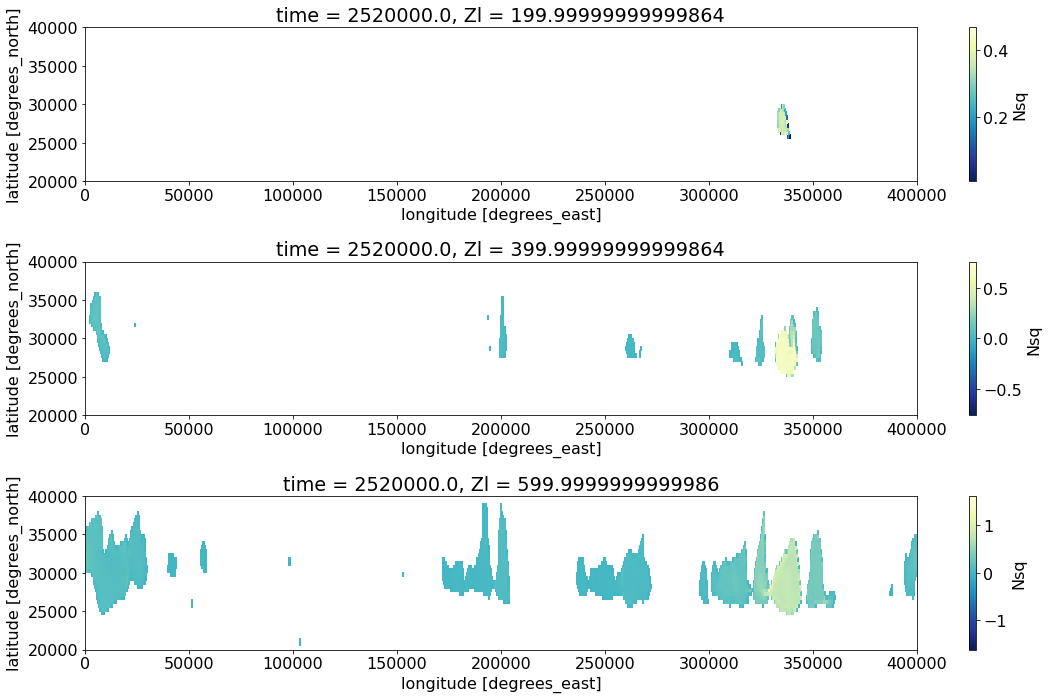

In [15]:
plt.figure(figsize=(16,10))

plt.subplot(3,1,1)
q = (ds['Nsq']*1e6).isel(time=ti).sel(Zl=200, method='nearest').plot(cmap='YlGnBu_r')
plt.ylim(2.0e4, 4.e4)

plt.subplot(3,1,2)
q = (ds['Nsq']*1e6).isel(time=ti).sel(Zl=400, method='nearest').plot(cmap='YlGnBu_r')
plt.ylim(2.0e4, 4.e4)

plt.subplot(3,1,3)
q = (ds['Nsq']*1e6).isel(time=ti).sel(Zl=600, method='nearest').plot(cmap='YlGnBu_r')
plt.ylim(2.0e4, 4.e4)

plt.tight_layout()

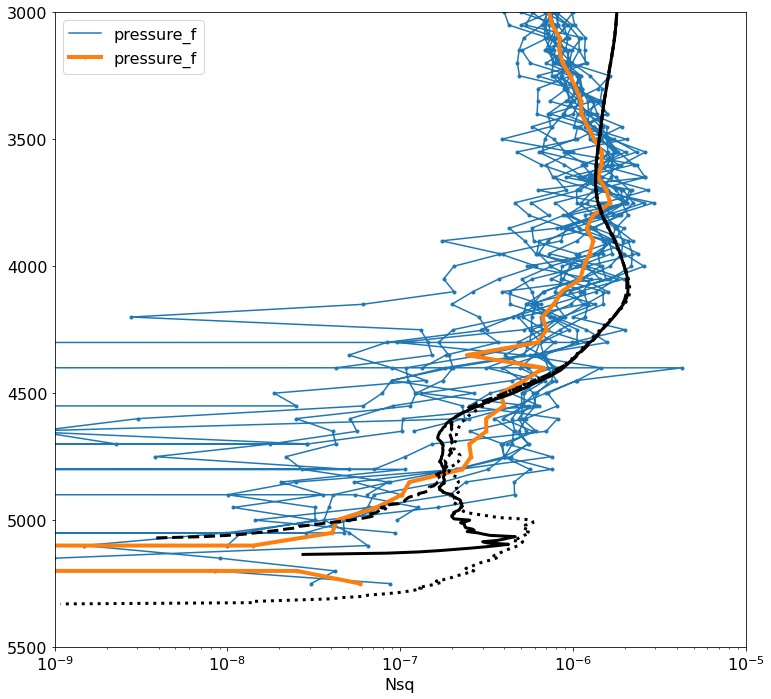

In [16]:
fig, ax = plt.subplots(figsize=(11,10))
cdf.plot(x='Nsq', y='pressure_f',marker='.', ax=ax, logx=True)
cdf.groupby('pressure_f').mean().reset_index().plot(x='Nsq', y='pressure_f',marker='.', color='C1', lw=4, ax=ax)


ti = -1
ds['pressure'] = 5350-ds['Zl']
Nsq = (ds['Nsq']).isel(time=ti).sel(YC=3.0e4, method='nearest').mean(dim='XC')
ax.semilogx(Nsq, ds['pressure'].values, "k-", lw=3.)
Nsq = (ds['Nsq']).isel(time=ti).sel(YC=3.25e4, method='nearest').mean(dim='XC')
ax.semilogx(Nsq, ds['pressure'].values, "k--", lw=3.)
Nsq = (ds['Nsq']).isel(time=ti).sel(YC=2.75e4, method='nearest').mean(dim='XC')
ax.semilogx(Nsq, ds['pressure'].values, "k:", lw=3.)
ax.set_ylim([5500,3000])
ax.set_xlim([1.e-9, 1.e-5])

plt.tight_layout()
plt.savefig("../../figures/compare_canyon_stratification_profile", dpi=200, bbox_inches='tight')

In [17]:
nx = len(cdf['cast number'].unique())
nz = len(cdf['pressure'].unique())

In [18]:

Nsq_sec = np.zeros((nx, nz))
sigma4_sec = np.zeros((nx, nz))
x = np.zeros(nx)
z = np.array(cdf['pressure'].unique())
for i, num in enumerate(cdf['cast number'].unique()):
    tmp = cdf[cdf['cast number']==num]
    Nsq_sec[i, :] = np.array(tmp['Nsq'].values)
    sigma4_sec[i,:] = np.array(tmp['sigma4'].values)
    x[i] = tmp['longitude'].values[0]

## Model-Observation Comparison

In [19]:
data_dir_2D = "../../MITgcm/experiments/rotated_BBTRE_2D/run/"
ds_2D = open_mdsdataset(data_dir_2D,iters=iters,ignore_unknown_vars=True,prefix=["standardDiag", "budgetDiag"])
ds_2D, coords_2D, grid_2D = pre_process(ds_2D)
ds_2D, coords_2D = add_cartesian_coordinates(ds_2D, coords_2D, θ)
ds_2D = add_background_temp(ds_2D, Γ)
ds_2D, coords_2D = add_hab_coordinates(ds_2D, coords_2D)
ds_2D = add_Nsq(ds_2D, Γ)

In [20]:
data_dir_2D0 = "../../MITgcm/experiments/unrotated_BBTRE_2D/run/"
ds_2D0 = open_mdsdataset(data_dir_2D0,iters=iters,ignore_unknown_vars=True,prefix=["standardDiag", "budgetDiag"])
ds_2D0, coords_2D0, grid_2D0 = pre_process(ds_2D0)
ds_2D0, coords_2D0 = add_cartesian_coordinates(ds_2D0, coords_2D0, 0.)
ds_2D0 = add_background_temp(ds_2D0, Γ)
ds_2D0, coords_2D0 = add_hab_coordinates(ds_2D0, coords_2D0)
ds_2D0 = add_Nsq(ds_2D0, Γ)

In [21]:
data_dir_2Df = "../../MITgcm/experiments/rotated_BBTRE_2D_f=0/run/"
ds_2Df = open_mdsdataset(data_dir_2Df,iters=iters,ignore_unknown_vars=True,prefix=["standardDiag", "budgetDiag"])
ds_2Df, coords_2Df, grid_2Df = pre_process(ds_2Df)
ds_2Df, coords_2Df = add_cartesian_coordinates(ds_2Df, coords_2Df, θ)
ds_2Df = add_background_temp(ds_2Df, Γ)
ds_2Df, coords_2Df = add_hab_coordinates(ds_2Df, coords_2Df)
ds_2Df = add_Nsq(ds_2Df, Γ)

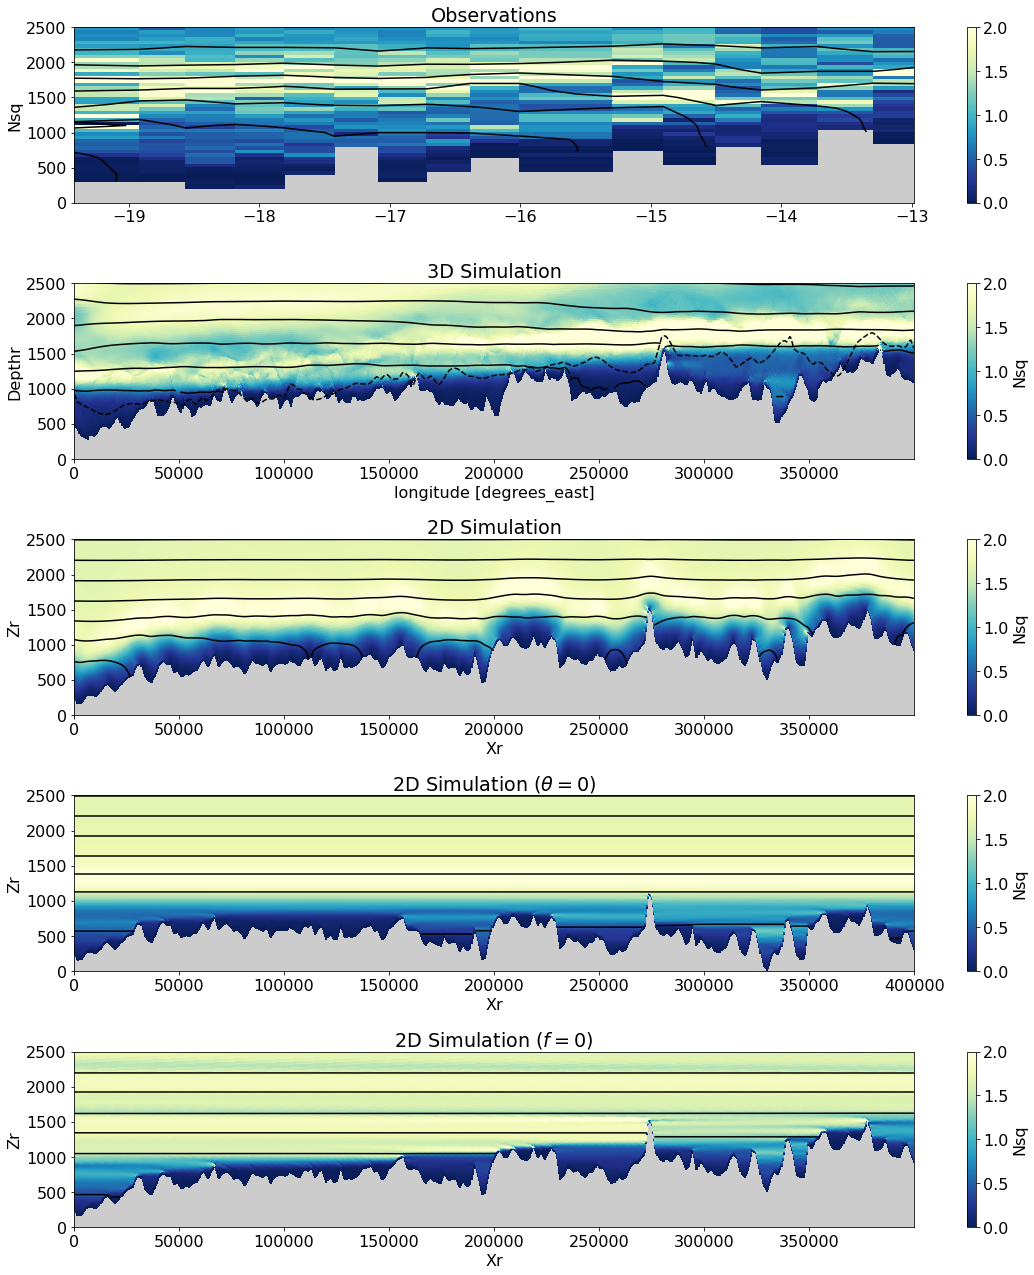

In [22]:
plt.figure(figsize=(16,18))

plt.subplot(5,1,1, facecolor=(.8, .8, .8))
plt.pcolormesh(x, -z+5500, np.transpose(Nsq_sec)*1.e6, cmap='YlGnBu_r')
plt.clim(0., 2.0)
plt.colorbar()
plt.contour(x, -z+5500, np.transpose(sigma4_sec), 10, colors="k")
plt.ylim([0, 2500])
plt.ylabel("Nsq")
plt.title("Observations")

plt.subplot(5,1,2, facecolor=(.8, .8, .8))
q = (ds['Nsq']*1e6).isel(time=ti).mean(dim='YC').plot(x='Xr_W', y='Zr_W', cmap='YlGnBu_r')
q.set_clim([0., 2.0])
ds['THETA_BG'].isel(time=ti).sel(YC=3e4, method='nearest').plot.contour(x='Xr', y='Zr', colors='black', levels=np.arange(0.4, 2.5, 0.25))
plt.ylim([0,2500])
(-coords['Depthr'].isel(YC=0) + coords['Depthr'].sel(YC=3.e4, XC=0, method='nearest')).plot(color="k",linestyle="--")
plt.title("3D Simulation")

plt.subplot(5,1,3, facecolor=(.8, .8, .8))
q = (ds_2D['Nsq']*1e6).isel(time=ti).mean(dim='YC').plot(x='Xr_W', y='Zr_W', cmap='YlGnBu_r')
q.set_clim([0., 2.0])
ds_2D['THETA_BG'].isel(time=ti).sel(YC=3e4, method='nearest').plot.contour(x='Xr', y='Zr', colors='black', levels=np.arange(0.4, 2.5, 0.25))
plt.ylim([0,2500])
plt.title("2D Simulation")

plt.subplot(5,1,4, facecolor=(.8, .8, .8))
q = (ds_2D0['Nsq']*1e6).isel(time=ti).mean(dim='YC').plot(x='Xr_W', y='Zr_W', cmap='YlGnBu_r')
q.set_clim([0., 2.0])
ds_2D0['THETA_BG'].isel(time=ti).sel(YC=3e4, method='nearest').plot.contour(x='Xr', y='Zr', colors='black', levels=np.arange(0.4, 2.5, 0.25))
plt.ylim([0,2500])
plt.title(r"2D Simulation ($\theta=0$)")

plt.subplot(5,1,5, facecolor=(.8, .8, .8))
q = (ds_2Df['Nsq']*1e6).isel(time=ti).mean(dim='YC').plot(x='Xr_W', y='Zr_W', cmap='YlGnBu_r')
q.set_clim([0., 2.0])
ds_2Df['THETA_BG'].isel(time=ti).sel(YC=3e4, method='nearest').plot.contour(x='Xr', y='Zr', colors='black', levels=np.arange(0.4, 2.5, 0.25))
plt.ylim([0,2500])
plt.title(r"2D Simulation ($f=0$)")

plt.tight_layout()
plt.savefig("../../figures/compare_canyon_stratification_section", dpi=200, bbox_inches='tight')

In [23]:
ds['ρ_BG'] = ρ0*(1-α*ds['THETA_BG'])
ds['ρ'] = ρ0*(1-α*ds['THETA'])

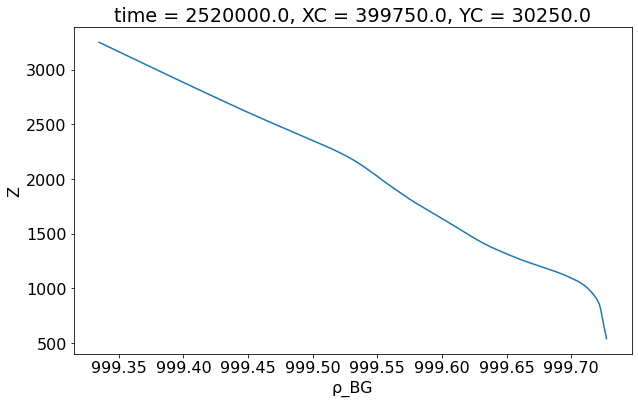

In [24]:
ds['ρ_BG'].sel(YC=3.e4, XC=4.3e5, method='nearest').isel(time=-1).plot(y='Z')

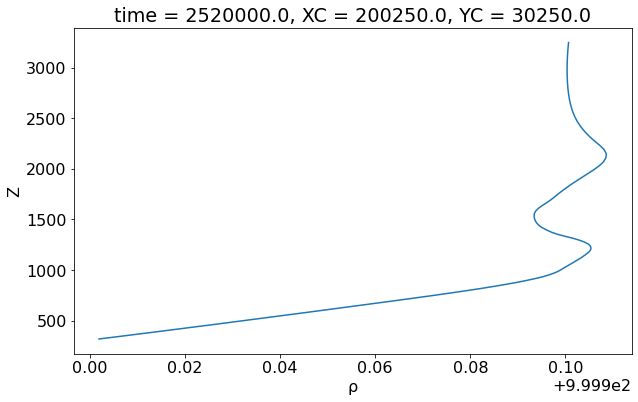

In [25]:
ds['ρ'].sel(YC=3.e4, XC=2.e5, method='nearest').isel(time=-1).plot(y='Z')

In [26]:
plt.figure(figsize=(14,8))

ζ = ζ.where(ζ != 0.)
p = (ζ/f).isel(time=-1).sel(Z=1200, method='nearest').plot(cmap=div_cmap)
p.set_clim([-1.,1.])

NameError: name 'ζ' is not defined

<Figure size 1008x576 with 0 Axes>

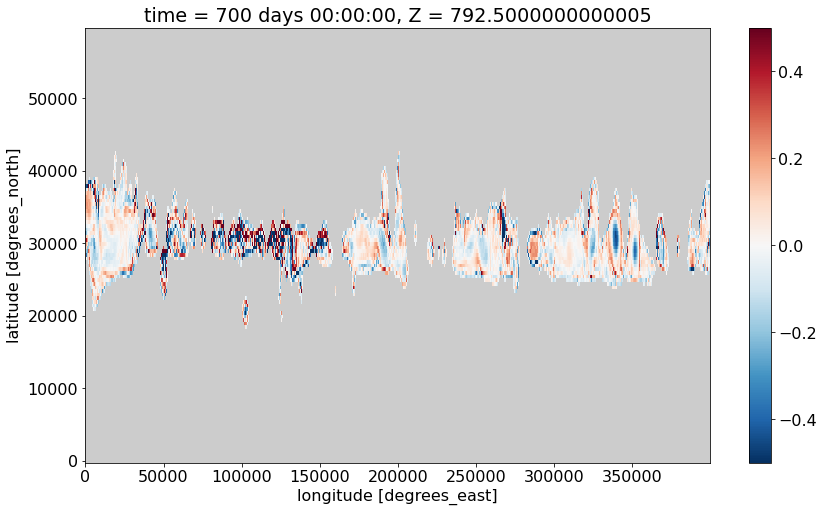

In [18]:
plt.figure(figsize=(14,8))

ζ = ζ.where(ζ != 0.)
p = (ζ/f).isel(time=-1).sel(Z=2500, method='nearest').plot(cmap=div_cmap)
p.set_clim([-0.5,0.5])

